<a href="https://colab.research.google.com/github/wingated/cs180_labs/blob/main/burrito_simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from tqdm import tqdm
plt.rcParams['figure.figsize'] = [12, 10]


In [37]:
def sample_burrito_type():
  btypes = ['beef','chicken','barbacoa','veggie','asada']
  bprobs = [ 0.2,  0.15,     0.3,       0.1,     0.25 ]
  return np.random.choice( btypes, p=bprobs )

def sample_burrito_calories( btype ):
  if btype=='beef':
    return 100*np.random.randn()+550
  if btype=='chicken':
    return 100*np.random.randn()+450
  if btype=='barbacoa':
    return 100*np.random.randn()+520
  if btype=='veggie':
    return 100*np.random.randn()+400
  if btype=='asada':
    return 100*np.random.randn()+500

def sample_drink_type():
  dtypes = ['coke','sprite','fanta','ibc','pepsi']
  dprobs = [ 0.1,  0.3,     0.2,    0.3,   0.1 ]
  return np.random.choice( dtypes, p=dprobs )

def sample_drink_size():
  stypes = ['small','medium','large']
  sprobs = [ 0.1,   0.8,     0.1 ]
  return np.random.choice( stypes, p=sprobs )

def sample_drink_calories( dtype, dsize ):
  
  if dtype=='coke':
    cals_per_oz = 50
  if dtype=='sprite':
    cals_per_oz = 60
  if dtype=='fanta':
    cals_per_oz = 65
  if dtype=='ibc':
    cals_per_oz = 45
  if dtype=='pepsi':
    cals_per_oz = 50

  if dsize=='small':
    return 10*np.random.randn() + 8*cals_per_oz
  if dsize=='medium':
    return 20*np.random.randn() + 16*cals_per_oz
  if dsize=='large':
    return 40*np.random.randn() + 32*cals_per_oz

def sample_meal():
  my_burrito = sample_burrito_type()
  my_drink = sample_drink_type()
  my_drink_size = sample_drink_size()
  #print( f'Your meal is a {my_burrito} burrito with a {my_drink_size} {my_drink}.' )
  burrito_calories = sample_burrito_calories( my_burrito )
  drink_calories = sample_drink_calories( my_drink, my_drink_size )
  return { "burrito":my_burrito, "drink":my_drink, "size":my_drink_size, "calories":burrito_calories + drink_calories }



In [38]:
sample_meal()

{'burrito': 'asada',
 'calories': 913.4163341712767,
 'drink': 'sprite',
 'size': 'small'}

In [51]:
df = pd.DataFrame()
for s in tqdm( range(1000) ):
  meal = sample_meal()
  df = df.append(meal,ignore_index=True)

100%|██████████| 1000/1000 [00:04<00:00, 214.11it/s]


In [52]:
df

,burrito,calories,drink,size
0,beef,1419.144952,coke,medium
1,beef,802.459568,ibc,small
2,veggie,1427.549408,sprite,medium
3,chicken,851.223452,ibc,small
4,asada,1378.128750,pepsi,medium
...,...,...,...,...
995,chicken,1343.343829,sprite,medium
996,barbacoa,1270.772958,ibc,medium
997,chicken,1172.342197,coke,medium
998,barbacoa,1606.065641,sprite,medium


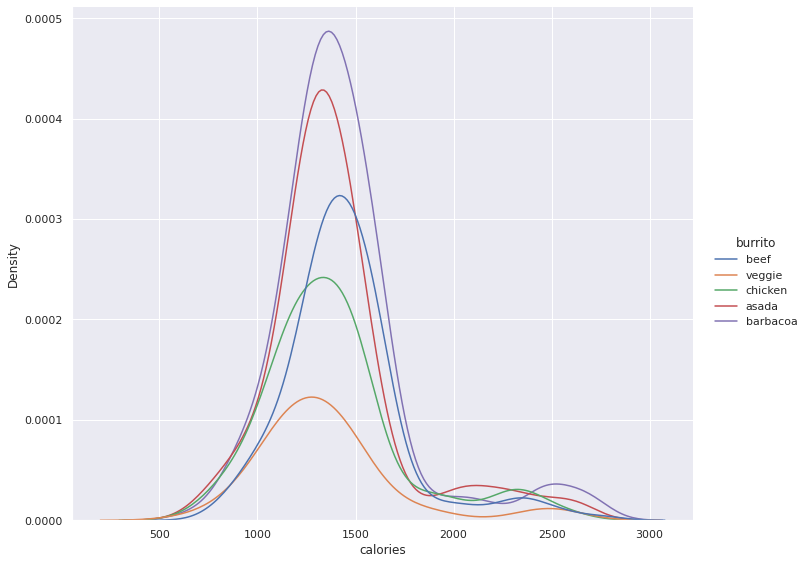

In [71]:
sns.displot( data=df, x='calories', hue='burrito', kind='kde', height=8, aspect=10/8)
#sns.displot( data=df, x='calories', hue='drink', kind='kde')
#sns.displot( data=df, x='calories', hue='size', kind='kde')

,burrito,calories,drink,size
6,barbacoa,2550.679862,fanta,large
11,beef,2752.458183,fanta,large
17,chicken,1424.403855,fanta,medium
21,barbacoa,1409.393882,fanta,medium
23,chicken,1407.511986,fanta,medium
...,...,...,...,...
969,barbacoa,1461.878010,fanta,medium
979,barbacoa,1470.139051,fanta,medium
980,chicken,1416.592585,fanta,medium
985,chicken,1548.493113,fanta,medium
